In [1]:
# parse GHData_functions-blind-clones/GHData_functions-blind-clones-0.30-classes-withsource.xml
# to get the all <source> tags in each <class> tag
# and write them to a file
import xml.etree.ElementTree as ET
import re
import pandas as pd

xml_file = "../../GHData_functions-blind-clones/GHData_functions-blind-clones-0.30-classes-withsource.xml"



In [2]:
import re
import xml.etree.ElementTree as ET


def remove_non_alpha_characters_inside_source_tags(xml_content):
    """
    Remove non-alphabetic characters (except spaces) inside <source> tags.
    """
    # Regular expression to find content within <source> tags
    source_tag_pattern = re.compile(r'(<source[^>]*>)(.*?)(</source>)', re.DOTALL)
    
    def remove_non_alpha_except_space(match):
        # Keep only alphabetic characters and spaces within the content of the <source> tag
        cleaned_content = re.sub(r'[^a-zA-Z\s]', ' ', match.group(2))
        # Reconstruct the <source> tag with cleaned content
        return match.group(1) + cleaned_content + match.group(3)
    
    # Apply the cleaning function to all occurrences of <source> tags
    return source_tag_pattern.sub(remove_non_alpha_except_space, xml_content)


In [3]:
# parse xml file
import xml.etree.ElementTree as ET

# make fileToClean get the file content 
with open(xml_file, 'r') as file:
    fileToClean = file.read()
cleanedContent = remove_non_alpha_characters_inside_source_tags(fileToClean)

# over write cleaned content 
with open("../../analysis/RQ3/cleaned.xml", 'w') as file:
    file.write(cleanedContent)

tree = ET.parse("../../analysis/RQ3/cleaned.xml")
root = tree.getroot()

# get elements by tag name
extractedCode = []
for class_ in root.findall("class"):
    appendedFile = ""
    for source in class_.findall("source"):
        appendedFile += source.text
    extractedCode.append(appendedFile)


In [4]:
from random import random
import math as Math
allBucketsInOne = ''
for class_ in root.findall("class"):
    appendedFile = ""
    sources_for_class = class_.findall("source")
    random_source = sources_for_class[ Math.floor( random() * len(sources_for_class) ) ]
    appendedFile += random_source.text
    allBucketsInOne += appendedFile
with open("../../analysis/RQ3/allBucketsInOne.txt", 'w') as file:
    file.write(allBucketsInOne)

In [5]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/abeeto/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/abeeto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/abeeto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
extractedCode[579]

'\n    def update self  memory  \n          Monte Carlo estimate of rewards \n        rewards     \n        discounted reward    \n        for reward  is terminal in zip reversed memory rewards   reversed memory is terminals   \n            if is terminal \n                discounted reward    \n            discounted reward   reward    self gamma   discounted reward \n            rewards insert    discounted reward \n        \n          Normalizing the rewards \n        rewards   torch tensor rewards  to device \n        rewards    rewards   rewards mean     rewards std    e   \n        \n          convert list to tensor\n        old states   torch squeeze torch stack memory states  to device      detach  \n        old actions   torch squeeze torch stack memory actions  to device      detach  \n        old logprobs   torch squeeze torch stack memory logprobs      to device  detach  \n        \n          Optimize policy for K epochs \n        for   in range self K epochs  \n           

In [7]:
def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatizes text."""
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)

    lemmatized_tokens = []

    for word, tag in tagged_tokens:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag is None:
            lemmatized_tokens.append(word)
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos=wn_tag))
    return('  '.join(lemmatized_tokens))

In [8]:
for i in range(len(extractedCode)):
    extractedCode[i] = lemmatize_text(extractedCode[i])

In [9]:
allBucketsInOne = lemmatize_text(allBucketsInOne)

In [10]:
extractedCode[579]

'def  update  self  memory  Monte  Carlo  estimate  of  reward  reward  discount  reward  for  reward  be  terminal  in  zip  reverse  memory  reward  reverse  memory  be  terminal  if  be  terminal  discount  reward  discount  reward  reward  self  gamma  discount  reward  reward  insert  discount  reward  Normalizing  the  reward  reward  torch  tensor  reward  to  device  reward  reward  reward  mean  reward  std  e  convert  list  to  tensor  old  state  torch  squeeze  torch  stack  memory  state  to  device  detach  old  action  torch  squeeze  torch  stack  memory  action  to  device  detach  old  logprobs  torch  squeeze  torch  stack  memory  logprobs  to  device  detach  Optimize  policy  for  K  epoch  for  in  range  self  K  epochs  Evaluating  old  action  and  value  logprobs  state  value  dist  entropy  self  policy  evaluate  old  state  old  action  Finding  the  ratio  pi  theta  pi  theta  old  ratio  torch  exp  logprobs  old  logprobs  detach  Finding  Surrogate 

In [11]:
import os
import json
import numpy as np
import pandas as pd
from scipy import stats
import gensim
from gensim.models import LdaModel
from gensim import corpora
from gensim.models.phrases import Phrases
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords, stem_text
from gensim.utils import to_unicode
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import scipy.sparse
from nltk.corpus import stopwords
import spacy
from gensim.parsing.preprocessing import STOPWORDS

In [12]:
def simple_tokenize(text):
    # Tokenize by splitting on non-alphanumeric characters
    return re.split(r'\W+', text)

def preprocessForTopicModelling(prompts_text, run_simple_tokenize=False):
    if run_simple_tokenize:
        processed_data = [simple_tokenize(text.lower()) for text in prompts_text]
    else:
        processed_data = [preprocess_string(text, filters=[lambda x: x.lower(), remove_stopwords, stem_text]) for text in prompts_text]
    dictionary = corpora.Dictionary(processed_data)
    corpus = [dictionary.doc2bow(text) for text in processed_data]

    return dictionary, corpus, processed_data

def get_sorted_topics(document_topic_dist):
    """Sort topics by their probability in descending order."""
    return [sorted(topics, key=lambda x: -x[1])[0] if topics else (None, 0) for topics in document_topic_dist]

def get_topic_details(lda_model, topic_id, num_words=7):
    """Retrieve detailed words and their probabilities for a topic."""
    if topic_id is not None:
        topic_words = lda_model.show_topic(topic_id, topn=num_words)
        return [(word, prob) for word, prob in topic_words]
    else:
        return ["No dominant topic or error in topic modeling"]
    
def getTopicInfo(lda_model, document_topic_dist, num_words=7):
    dominant_topic_info = pd.DataFrame()
    sorted_topics = get_sorted_topics(document_topic_dist)
    for i, (topic_id, prob) in enumerate(sorted_topics):
        topic_info = get_topic_details(lda_model, topic_id, num_words)
        dominant_topic_info = pd.concat([dominant_topic_info, pd.DataFrame({"Topic ID": [topic_id], "Topic Probability": [prob], "Topic Words": [topic_info]})], ignore_index=True)

    all_topics_info = pd.DataFrame()
    for topics in document_topic_dist:
        if topics:  # Ensure topics is not empty
            for topic_id, prob in topics:
                topic_info = get_topic_details(lda_model, topic_id, num_words)
                all_topics_info = pd.concat([all_topics_info, pd.DataFrame({"Topic ID": [topic_id], "Topic Probability": [prob], "Topic Words": [topic_info]})], ignore_index=True)
    return all_topics_info, dominant_topic_info


def runTopicModelling(processed_data, dictionary, corpus, optimal_num_topics=5):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, passes=10)
    document_topic_dist = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

    all_topics_info, dominant_topic_info = getTopicInfo(lda_model, document_topic_dist, num_words=7)
    return all_topics_info, dominant_topic_info

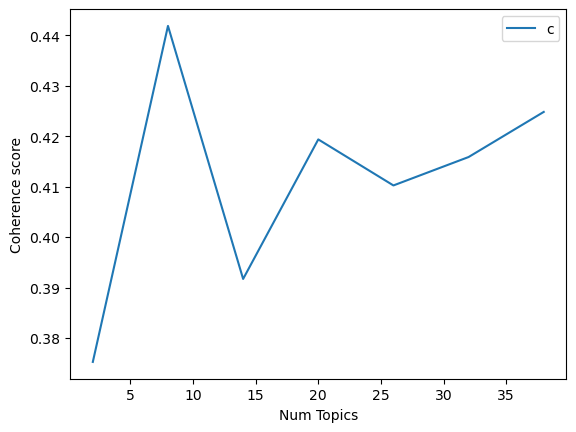

In [13]:
# find optimal number of topics to use in LDA by using coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step = 6):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step = 2, 40, 6
dictionary, corpus, processed_data = preprocessForTopicModelling(extractedCode)

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# give max coherence score from the graph
max_coherence_score = max(coherence_values)
max_coherence_score_index = coherence_values.index(max_coherence_score)
optimal_num_topics = x[max_coherence_score_index]
optimal_num_topics

8

In [15]:
dictionary, corpus, processed_data = preprocessForTopicModelling(extractedCode , run_simple_tokenize=True)
all_topics_info, dominant_topic_info = runTopicModelling(processed_data, dictionary, corpus, optimal_num_topics=optimal_num_topics)

In [16]:
all_topics_info

,Topic ID,Topic Probability,Topic Words
0,0,0.000339,"[(self, 0.19366688), (nn, 0.06379178), (d, 0.0..."
1,1,0.166266,"[(image, 0.036314674), (path, 0.03450716), (im..."
2,2,0.000339,"[(m, 0.019415414), (data, 0.016313631), (if, 0..."
3,3,0.122062,"[(x, 0.123805344), (self, 0.04888734), (out, 0..."
4,4,0.211969,"[(loss, 0.06707748), (batch, 0.028360616), (la..."
...,...,...,...
26611,3,0.000599,"[(x, 0.123805344), (self, 0.04888734), (out, 0..."
26612,4,0.000599,"[(loss, 0.06707748), (batch, 0.028360616), (la..."
26613,5,0.000599,"[(tensor, 0.026480533), (image, 0.025498932), ..."
26614,6,0.009328,"[(i, 0.036688775), (in, 0.02817), (for, 0.0221..."


In [17]:
dominant_topic_info

,Topic ID,Topic Probability,Topic Words
0,5,0.472178,"[(tensor, 0.026480533), (image, 0.025498932), ..."
1,7,0.854864,"[(model, 0.037474528), (args, 0.02895278), (tr..."
2,2,0.524535,"[(m, 0.019415414), (data, 0.016313631), (if, 0..."
3,2,0.520338,"[(m, 0.019415414), (data, 0.016313631), (if, 0..."
4,3,0.675147,"[(x, 0.123805344), (self, 0.04888734), (out, 0..."
...,...,...,...
3322,0,0.910444,"[(self, 0.19366688), (nn, 0.06379178), (d, 0.0..."
3323,2,0.729933,"[(m, 0.019415414), (data, 0.016313631), (if, 0..."
3324,1,0.589365,"[(image, 0.036314674), (path, 0.03450716), (im..."
3325,0,0.846604,"[(self, 0.19366688), (nn, 0.06379178), (d, 0.0..."


In [18]:
all_topics_info.to_csv("../../analysis/RQ3/all_topics_info.csv", index=False)
dominant_topic_info.to_csv("../../analysis/RQ3/dominant_topic_info.csv", index=False)

## LDA Modelling on one entire document
- randomly pick one pre processed snippet from each class/bucket
- concatenate them into one document 
- apply topic modelling on that big single document

In [19]:
preprocessForTopicModelling([allBucketsInOne], run_simple_tokenize=True)

dictionary, corpus, processed_data = preprocessForTopicModelling([allBucketsInOne], run_simple_tokenize=True)
all_topics_info, dominant_topic_info = runTopicModelling(processed_data, dictionary, corpus, optimal_num_topics=optimal_num_topics)

In [20]:
all_topics_info

,Topic ID,Topic Probability,Topic Words
0,0,2.285066e-07,"[(self, 0.016131181), (size, 0.0096446015), (i..."
1,1,2.285783e-07,"[(self, 0.022960866), (size, 0.01753713), (los..."
2,2,2.283841e-07,"[(self, 0.0056956187), (size, 0.003719733), (m..."
3,3,9.999984e-01,"[(self, 0.034579303), (size, 0.015174575), (mo..."
4,4,2.283922e-07,"[(self, 0.008165202), (size, 0.003073128), (nn..."
5,5,2.284314e-07,"[(self, 0.007421445), (size, 0.0059193335), (i..."
6,6,2.284582e-07,"[(self, 0.014206006), (model, 0.0058023576), (..."
7,7,2.286663e-07,"[(self, 0.028471768), (size, 0.01471322), (if,..."


In [21]:
dominant_topic_info

,Topic ID,Topic Probability,Topic Words
0,3,0.999998,"[(self, 0.034579303), (size, 0.015174575), (mo..."


In [22]:
all_topics_info.to_csv("../../analysis/RQ3/all_topics_info_allBuckets.csv", index=False)
dominant_topic_info.to_csv("../../analysis/RQ3/dominant_topic_info_allBuckets.csv", index=False)